In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import odr
import matplotlib.pyplot as plt

## Linear Curve Fitting for Change in Pressure vs Fringe Count

\begin{align}
\mu &= 1 + \frac{N \lambda P_a}{2l\Delta{P}} \\[8 pt]
\Delta{P} &= \frac{\lambda P_a}{2l(\mu-1)}N
\end{align}

In [7]:
pressure = [300, 276, 250, 228, 206, 184, 160, 138, 114, 94, 72]
df = pd.DataFrame({'n': np.arange(0,22,2), 'P_g (mmHg)': pressure})

P_a = 753
λ = 632.8e-9
l = 80e-3
Δn = 2

# P_g is Gauge pressure, P is absolute pressure. P = P_g + P_a
# Refractivity N = (mu - 1)*10^6
df['P (mmHg)'] = P_a + df['P_g (mmHg)']
df = df.sort_values(by='P (mmHg)')
df['ΔP/Δn'] = -df['P (mmHg)'].diff()/df['n'].diff()
df['N'] = ((λ*1e6)/(2*l))*(1/df['ΔP/Δn'].mean())*df['P (mmHg)']
df['N_seq'] = ((λ*1e6)/(2*l))*(1/df['ΔP/Δn'])*df['P (mmHg)']

display(df)

,n,P_g (mmHg),P (mmHg),ΔP/Δn,N,N_seq
10,20,72,825,NaN,286.217105,NaN
9,18,94,847,11.0,293.849561,304.535000
8,16,114,867,10.0,300.788158,342.898500
7,14,138,891,12.0,309.114474,293.658750
6,12,160,913,11.0,316.746930,328.265000
5,10,184,937,12.0,325.073246,308.819583
4,8,206,959,11.0,332.705702,344.804091
3,6,228,981,11.0,340.338158,352.714091
2,4,250,1003,11.0,347.970614,360.624091
1,2,276,1029,13.0,356.990789,313.053462


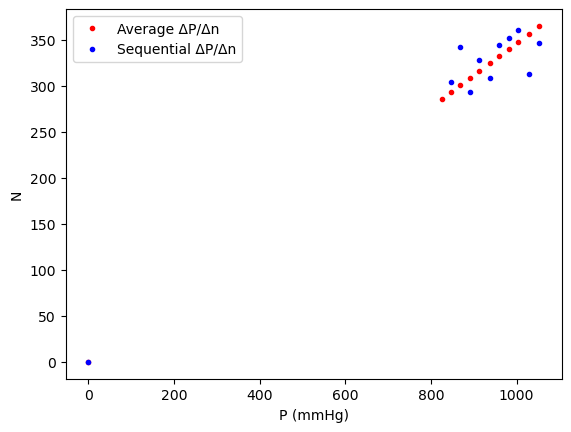

In [9]:
N, _ = df.shape

x = df['P (mmHg)'].to_numpy()
x = np.insert(x, 0, 0)
y = df['N'].to_numpy()
y = np.insert(y, 0, 0)
y_2 = df['N_seq'].to_numpy()
y_2 = np.insert(y_2, 0, 0)

plt.plot(x, y, '.', color='red', label='Average ΔP/Δn')
plt.plot(x, y_2, '.', color='blue', label='Sequential ΔP/Δn')
plt.xlabel('P (mmHg)')
plt.ylabel('N')
#plt.plot(x_model, y_model, '-', color='blue', label='Curve Fit')
plt.legend()
plt.show()